# Prosjekt Del 1

## Laster inn moduler 

In [1656]:
#SJEKK OM ALLE MODULENE ER LOVLIGE I OPPGAVEBESKRIVELSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


### Innstillinger for å få en mer omfattende visning av alle dataframene

In [1657]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.expand_frame_repr", False)

## Laster inn filer (rådata)

In [1658]:
demographic_df = pd.read_csv("./raw_data/demographic.csv")
hospital_df = pd.read_csv("./raw_data/hospital.csv")
phychological_df = pd.read_csv("./raw_data/physiological.txt", sep="\t")
severity_df = pd.read_json("./raw_data/severity.json")

### Analyserer datasettene

In [1659]:
phychological_df.head()

,pasient_id,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,bilirubin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde
0,2,43.0,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN
1,3,70.0,8.500000,88.0,28.0,37.39844,231.65625,NaN,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN
2,4,75.0,9.099609,88.0,32.0,35.00000,NaN,NaN,NaN,0.799927,139.0,NaN,NaN,NaN,NaN
3,5,59.0,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN
4,6,110.0,10.398438,101.0,44.0,38.39844,266.62500,NaN,NaN,0.699951,140.0,7.659180,NaN,NaN,NaN


In [1660]:
phychological_df.describe(include="all")

,pasient_id,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,bilirubin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde
count,7740.000000,7740.000000,7565.000000,7740.000000,7740.000000,7740.000000,5796.000000,4891.000000,5544.000000,7683.000000,7740.000000,5828.000000,3917.000000,4048.000000,3627.000000
mean,4540.665375,84.412468,12.302026,97.283940,23.348450,37.116579,239.608379,2.952622,2.565599,1.790278,137.574160,7.415439,160.031146,32.582040,2185.398372
std,2636.463416,27.713746,9.108076,31.499505,9.549561,1.257278,109.942808,0.889463,5.318276,1.711926,6.029887,0.080844,87.828819,26.826593,1458.900940
min,2.000000,0.000000,0.000000,0.000000,0.000000,31.699220,12.000000,0.399963,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000
25%,2244.750000,63.000000,6.899414,72.000000,18.000000,36.195310,155.093750,2.399902,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1175.000000
50%,4539.500000,77.000000,10.599609,100.000000,24.000000,36.695310,223.984375,2.899902,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1963.000000
75%,6816.250000,107.000000,15.298828,120.000000,28.000000,38.195310,304.750000,3.599609,1.899902,1.899902,141.000000,7.469727,190.000000,43.000000,2980.000000
max,9105.000000,195.000000,128.781250,232.000000,90.000000,41.695310,869.375000,29.000000,63.000000,21.500000,181.000000,7.769531,1092.000000,192.000000,9000.000000


In [1661]:
demographic_df.head()

,pasient_id,alder,kjønn,utdanning,inntekt,etnisitet
0,2,60.33899,female,12.0,$11-$25k,white
1,3,52.74698,female,12.0,under $11k,white
2,4,42.38498,female,11.0,under $11k,white
3,5,79.88495,female,NaN,NaN,white
4,6,93.01599,male,14.0,NaN,white


In [1662]:
demographic_df.describe(include="all")

,pasient_id,alder,kjønn,utdanning,inntekt,etnisitet
count,7742.000000,7742.000000,7742,6360.000000,5223,7705
unique,NaN,NaN,2,NaN,4,5
top,NaN,NaN,male,NaN,under $11k,white
freq,NaN,NaN,4370,NaN,2426,6120
mean,4539.500517,62.710904,NaN,11.752987,NaN,NaN
std,2637.118792,15.688113,NaN,3.458671,NaN,NaN
min,2.000000,-1.000000,NaN,0.000000,NaN,NaN
25%,2243.250000,52.915240,NaN,10.000000,NaN,NaN
50%,4538.500000,65.008000,NaN,12.000000,NaN,NaN
75%,6815.750000,74.131487,NaN,14.000000,NaN,NaN


In [1663]:
hospital_df.head()

,pasient_id,sykehusdød,oppholdslengde
0,2,1,4
1,3,0,17
2,4,0,3
3,5,0,-99
4,6,1,4


In [1664]:
hospital_df.describe(include="all")

,pasient_id,sykehusdød,oppholdslengde
count,7740.000000,7740.000000,7740.000000
mean,4540.665375,0.263178,17.728682
std,2636.463416,0.440387,21.995401
min,2.000000,0.000000,-99.000000
25%,2244.750000,0.000000,6.000000
50%,4539.500000,0.000000,11.000000
75%,6816.250000,1.000000,20.000000
max,9105.000000,1.000000,343.000000


Håndterer manglende verdier i fysiologiske data med anbefalte eksempelverdier fra: https://archive.ics.uci.edu/dataset/880/support2
 

In [1665]:
nan_values = phychological_df.isna().sum()
print(nan_values)

pasient_id                 0
blodtrykk                  0
hvite_blodlegemer        175
hjertefrekvens             0
respirasjonsfrekvens       0
kroppstemperatur           0
lungefunksjon           1944
serumalbumin            2849
bilirubin               2196
kreatinin                 57
natrium                    0
blod_ph                 1912
glukose                 3823
blodurea_nitrogen       3692
urinmengde              4113
dtype: int64


In [1666]:
phychological_df["serumalbumin"].fillna(3.5,inplace=True)
phychological_df["bilirubin"].fillna(1.01,inplace=True)
phychological_df["kreatinin"].fillna(1.01,inplace=True) # creatinine (crea)
phychological_df["hvite_blodlegemer"].fillna(9,inplace=True) # white bloog count
phychological_df["urinmengde"].fillna(2502,inplace=True) # urine output (urine)

C:\Users\andre\AppData\Local\Temp\ipykernel_14456\813871059.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\andre\AppData\Local\Temp\ipykernel_14456\813871059.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

## Håndtering av .json fil (Serverity data)

Denne filen kommer i et annet format, der alle kolonnene utenom de to første er lister. For å kunne slå sammen alle DataFrame-ene til én felles DataFrame, er det nødvendig at alle har samme format. Derfor velger jeg å bruke explode(). Når jeg bruker explode() på en kolonne, vil hver verdi i listen bli plassert i sin egen rad, mens de andre kolonneverdiene i samme rad forblir uendret. Dette betyr at h\for hver listeverdi i en olnne vil det opprettes en ny rad, noe som effektivt "utvider" Dataframen. Dette trinnet er avgjørende for å forbedre dataene for videre behandling, som for eksempel modellering og statistisk analyse

In [1667]:
severity_df.head()

,sykdomskategori_id,sykdomskategori,pasient_id,dødsfall,sykdom_underkategori,antall_komorbiditeter,koma_score,adl_pasient,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,kreft,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_status,dnr_dag
0,A1s,ARF/MOSF,"[5, 15, 18, 23, 28, 34, 39, 43, 46, 47, 48, 58...","[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, ...","[ARF/MOSF w/Sepsis, ARF/MOSF w/Sepsis, ARF/MOS...","[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 3, 1, 3, ...","[26.0, 26.0, 26.0, 0.0, 26.0, 37.0, 0.0, 0.0, ...","[None, None, None, None, None, None, None, Non...","[2.0, None, 0.0, 5.0, 2.0, None, 0.0, None, No...","[23.5, 30.5, 40.296875, 31.6992188, 46.796875,...","[30.0, 39.0, 58.0, 42.0, 85.0, 49.0, 5.0, 76.0...","[0.6348876950000001, 0.590942383, 0.2129821780...","[0.5329589840000001, 0.481994629, 0.1169891360...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[no, no, no, no, yes, no, no, no, no, no, yes,...","[0.899999619, 0.899999619, 0.09999996400000001...","[0.9, 0.9, 0.001, 0.5, 0.000125, 0.60000000000...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
1,BrY,COPD/CHF/Cirrhosis,"[2, 3, 7, 8, 11, 13, 14, 19, 20, 30, 31, 32, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, ...","[Cirrhosis, Cirrhosis, CHF, CHF, CHF, Cirrhosi...","[2, 2, 1, 3, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1, ...","[44.0, 0.0, 0.0, 26.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[None, 1.0, 0.0, None, 2.0, 0.0, 0.0, 7.0, 3.0...","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 7.0, None,...","[52.6953125, 20.5, 17.296875, 21.5976562, 14.5...","[74.0, 45.0, 46.0, 53.0, 14.0, 30.0, 34.0, 42....","[0.000999928, 0.790893555, 0.892944336, 0.6708...","[0.0, 0.6649169920000001, 0.820922852, 0.49896...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[no, no, no, no, no, no, no, no, no, no, no, n...","[0.0, 0.75, None, 0.799999714, 0.699999809, No...","[0.0, 0.5, 0.7000000000000001, 0.4, 0.5, None,...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
2,ChE,Cancer,"[4, 9, 10, 12, 16, 17, 21, 24, 27, 41, 42, 54,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[Lung Cancer, Lung Cancer, Colon Cancer, Lung ...","[2, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 1, ...","[0.0, 26.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 44.0...","[0.0, None, 0.0, 1.0, 2.0, None, 0.0, None, No...","[0.0, 7.0, None, 1.0, 0.0, None, 0.0, None, No...","[20.0976562, 15.8984375, 2.2998047, 16.3984375...","[19.0, 17.0, 9.0, 17.0, 11.0, 4.0, 16.0, 11.0,...","[0.6989746090000001, 0.570922852, 0.9528808590...","[0.411987305, 0.24899292, 0.8879394530000001, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[metastatic, metastatic, metastatic, metastati...","[0.899999619, 0.049999982000000005, None, None...","[0.5, 0.000125, None, None, 0.7000000000000001...","[None, dnr ved innleggelse, None, None, None, ...","[None, 0.0, None, None, None, None, None, None..."
3,DWw,Coma,"[6, 162, 188, 250, 252, 262, 275, 309, 323, 35...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...","[Coma, Coma, Coma, Coma, Coma, Coma, Coma, Com...","[1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 0, ...","[55.0, 61.0, 94.0, 55.0, 94.0, 100.0, 100.0, 5...","[None, None, None, None, None, None, None, Non...","[1.0, None, None, 1.0, None, None, None, None,...","[19.3984375, 30.3984375, 20.296875, 30.8984375...","[27.0, 36.0, 22.0, 53.0, 40.0, 25.0, 58.0, 16....","[0.28497314500000004, 0.438964844, 0.280944824...","[0.214996338, 0.365966797, 0.211975098, 0.2729...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[no, no, no, no, yes, no, no, no, no, no, no, ...","[0.0, None, None, None, None, 0.09999996400000...","[0.0, None, N

## Kommentar etter bruk av explode() på df_severity

Dataen ser fin og oversiktelig ut. Inneholder rikelig med binære verdier. Binære verdier er ideelt for modelleringen som skal gjøres i del 2. Dette fordi binære verdier gir enkelhet, effektivitet og klare klassifiseringsmuligheter.

In [1668]:
# Bruker explode() på kolonner med lister i. 
columns_to_list = severity_df.columns.to_list()
valid_columns = columns_to_list[2:]
severity_df = severity_df.explode(valid_columns, ignore_index=True)

In [1669]:
severity_df.head()

,sykdomskategori_id,sykdomskategori,pasient_id,dødsfall,sykdom_underkategori,antall_komorbiditeter,koma_score,adl_pasient,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,kreft,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_status,dnr_dag
0,A1s,ARF/MOSF,5,0,ARF/MOSF w/Sepsis,1,26.0,None,2.0,23.5,30.0,0.634888,0.532959,0,0,no,0.9,0.9,None,None
1,A1s,ARF/MOSF,15,0,ARF/MOSF w/Sepsis,1,26.0,None,None,30.5,39.0,0.590942,0.481995,0,0,no,0.9,0.9,None,None
2,A1s,ARF/MOSF,18,1,ARF/MOSF w/Sepsis,0,26.0,None,0.0,40.296875,58.0,0.212982,0.116989,0,0,no,0.1,0.001,None,None
3,A1s,ARF/MOSF,23,0,ARF/MOSF w/Sepsis,1,0.0,None,5.0,31.699219,42.0,0.650879,0.55188,0,0,no,0.6,0.5,None,None
4,A1s,ARF/MOSF,28,1,MOSF w/Malig,1,26.0,None,2.0,46.796875,85.0,0.021,0.004999,0,0,yes,0.05,0.000125,None,None


In [1670]:
severity_df.describe(include="all")

,sykdomskategori_id,sykdomskategori,pasient_id,dødsfall,sykdom_underkategori,antall_komorbiditeter,koma_score,adl_pasient,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,kreft,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_status,dnr_dag
count,7740,7740,7740,7740,7740,7740,7740.0,2942.0,5299.0,7740.000000,7740.0,7740.0,7740.0,7740,7740,7740,6319.0,6333.0,1070,1070.0
unique,4,4,7740,2,8,10,11.0,8.0,8.0,584.000000,124.0,939.0,935.0,2,2,3,48.0,80.0,2,18.0
top,A1s,ARF/MOSF,5,1,ARF/MOSF w/Sepsis,1,0.0,0.0,0.0,20.699219,32.0,0.0,0.0,0,0,no,0.5,0.5,dnr ved innleggelse,0.0
freq,3618,3618,1,5317,3002,2572,5419.0,1576.0,2633.0,52.000000,198.0,125.0,175.0,6222,7480,5086,892.0,947.0,858,896.0


## Slår alle dataframene sammen i et felles datasett. 

For at det skal være mulig å slå dataframene sammen ved hjelp av concat() er det nødvendig at alle dataframene har likt antall rader. Hvis ikke kan analyse føre til uventede resultater, som duplikater eller manglende data

In [1671]:
# Fjerner duplikater i demografisk data. Da har alle datasettene like mange rader, og kan sammenslås

demographic_df = demographic_df.drop_duplicates()

print('Demographic data:', demographic_df.shape)
print('Hospital data:', hospital_df.shape)
print('Physiological data:', phychological_df.shape)
print('Severity data:', severity_df.shape)

Demographic data: (7740, 6)
Hospital data: (7740, 3)
Physiological data: (7740, 15)
Severity data: (7740, 20)


In [1672]:
# Tilbakestiller indeksene.

demographic_df = demographic_df.reset_index(drop=True)
hospital_df = hospital_df.reset_index(drop=True).drop(columns=['pasient_id'])
phychological_df = phychological_df.reset_index(drop=True).drop(columns=['pasient_id'])
severity_df = severity_df.reset_index(drop=True).drop(columns=['pasient_id'])

# Slår så sammen datasettene til et stort datasett: df
df = pd.concat([demographic_df, hospital_df, phychological_df, severity_df], axis=1)

### Undersøker sammenslått datasett






In [1673]:
df.head()

,pasient_id,alder,kjønn,utdanning,inntekt,etnisitet,sykehusdød,oppholdslengde,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,bilirubin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde,sykdomskategori_id,sykdomskategori,dødsfall,sykdom_underkategori,antall_komorbiditeter,koma_score,adl_pasient,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,kreft,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_status,dnr_dag
0,2,60.33899,female,12.0,$11-$25k,white,1,4,43.0,17.097656,112.0,34.0,34.59375,98.00000,3.5,1.010000,5.500000,132.0,7.250000,NaN,NaN,2502.0,A1s,ARF/MOSF,0,ARF/MOSF w/Sepsis,1,26.0,None,2.0,23.5,30.0,0.634888,0.532959,0,0,no,0.9,0.9,None,None
1,3,52.74698,female,12.0,under $11k,white,0,17,70.0,8.500000,88.0,28.0,37.39844,231.65625,3.5,2.199707,2.000000,134.0,7.459961,NaN,NaN,2502.0,A1s,ARF/MOSF,0,ARF/MOSF w/Sepsis,1,26.0,None,None,30.5,39.0,0.590942,0.481995,0,0,no,0.9,0.9,None,None
2,4,42.38498,female,11.0,under $11k,white,0,3,75.0,9.099609,88.0,32.0,35.00000,NaN,3.5,1.010000,0.799927,139.0,NaN,NaN,NaN,2502.0,A1s,ARF/MOSF,1,ARF/MOSF w/Sepsis,0,26.0,None,0.0,40.296875,58.0,0.212982,0.116989,0,0,no,0.1,0.001,None,None
3,5,79.88495,female,NaN,NaN,white,0,-99,59.0,13.500000,112.0,20.0,37.89844,173.31250,3.5,1.010000,0.799927,143.0,7.509766,NaN,NaN,2502.0,A1s,ARF/MOSF,0,ARF/MOSF w/Sepsis,1,0.0,None,5.0,31.699219,42.0,0.650879,0.55188,0,0,no,0.6,0.5,None,None
4,6,93.01599,male,14.0,NaN,white,1,4,110.0,10.398438,101.0,44.0,38.39844,266.62500,3.5,1.010000,0.699951,140.0,7.659180,NaN,NaN,2502.0,A1s,ARF/MOSF,1,MOSF w/Malig,1,26.0,None,2.0,46.796875,85.0,0.021,0.004999,0,0,yes,0.05,0.000125,None,None


In [1674]:
df.describe()

,pasient_id,alder,utdanning,sykehusdød,oppholdslengde,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,bilirubin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde
count,7740.000000,7740.000000,6359.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,5796.000000,7740.000000,7740.000000,7740.000000,7740.000000,5828.000000,3917.000000,4048.000000,7740.000000
mean,4540.665375,62.712258,11.753106,0.263178,17.728682,84.412468,12.227368,97.283940,23.348450,37.116579,239.608379,3.154105,2.124243,1.784532,137.574160,7.415439,160.031146,32.582040,2353.639005
std,2636.463416,15.688039,3.458930,0.440387,21.995401,27.713746,9.017879,31.499505,9.549561,1.257278,109.942808,0.754716,4.555226,1.706914,6.029887,0.080844,87.828819,26.826593,1011.035013
min,2.000000,-1.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,31.699220,12.000000,0.399963,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000
25%,2244.750000,52.921740,10.000000,0.000000,6.000000,63.000000,7.000000,72.000000,18.000000,36.195310,155.093750,2.699707,0.599976,0.899902,134.000000,7.379883,103.000000,14.000000,2050.000000
50%,4539.500000,65.008000,12.000000,0.000000,11.000000,77.000000,10.398438,100.000000,24.000000,36.695310,223.984375,3.500000,1.010000,1.199951,137.000000,7.419922,135.000000,23.000000,2502.000000
75%,6816.250000,74.133747,14.000000,1.000000,20.000000,107.000000,15.099609,120.000000,28.000000,38.195310,304.750000,3.500000,1.299805,1.899902,141.000000,7.469727,190.000000,43.000000,2502.000000
max,9105.000000,101.847960,31.000000,1.000000,343.000000,195.000000,128.781250,232.000000,90.000000,41.695310,869.375000,29.000000,63.000000,21.500000,181.000000,7.769531,1092.000000,192.000000,9000.000000


#### Databehandling

Å konvertere kolonner fra objekt til numerisk format er en viktig del av datarengjøring og forberedelse før analysering og modellering. Det sikrer at dataene er i et format som kan brukes effektivt og korrekt av maskinlæringsalgoritmer og statistiske analyser.

In [1675]:
# Konverterer kolonnene fra objekt til numerisk format. Denne forberedelsen er viktig før analyse og modellering.

df[['dødsfall','antall_komorbiditeter' ,'koma_score' ,'adl_pasient' ,'adl_stedfortreder' ,'fysiologisk_score' ,'apache_fysiologisk_score', 'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd','diabetes', 'demens', 'lege_overlevelsesestimat_2mnd','lege_overlevelsesestimat_6mnd', 'dnr_dag']] = df[['dødsfall', 'antall_komorbiditeter', 'koma_score', 'adl_pasient', 'adl_stedfortreder', 'fysiologisk_score','apache_fysiologisk_score' ,'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd','diabetes', 'demens','lege_overlevelsesestimat_2mnd','lege_overlevelsesestimat_6mnd', 'dnr_dag']].apply(pd.to_numeric)

#### Ser på verdier som ikke gir mening

In [1676]:
# Merker fra tidligere undersøkelser at det finnes pasienter med negativ oppholdslengde. Disse verdiene må behandles.

negativ_oppholdslengde = df[df["oppholdslengde"] < 0]
len(negativ_oppholdslengde)

6

In [1677]:
# Merker fra tidligere undersøkelser at det finnes pasienter med negativ alder. Disse verdiene må behandles.

negativ_alder = df[df["alder"] < 0]
len(negativ_alder)

5

#### Fjerner kolonnene som ikke er relevante

* Dødsfall: Ikke relevant for prediksjon av oppholdslengde. Dødsfall skjer ikke nødvendigvis på dag én (når oppholdslengde skal predikeres).

* Pasient_id: ikke nødvendig, vi indekserer heller hver rad.

* Sykehusdød: fjernes av samme grunn som dødsfall.

* adl_pasient: dataen hentes ved dag 7. Kan ha dårlig innvirkning på prediksjon av oppholdslengde på dag én.

* Bilirubin: fjernes av samme grunn som adl_pasient.

* Sykdomskategori_id: fjernes fordi den har samme funksjon som sykdomskategori.


In [1678]:
# Fjerner pasientene med negativ oppholdslengde og alder. 

df = df[df["oppholdslengde"] >= 0]
df = df[df["alder"] >= 0]

irrelevant_columns = ["dødsfall", "pasient_id", "sykehusdød", "adl_pasient", "bilirubin", "sykdomskategori_id"]

df = df.drop(columns=irrelevant_columns, axis=1)

## Dele inn i trenings-, validerings- og testdata



In [1679]:
seed = 0

# Splitt data i trenings- og testsett
X = df.drop(columns=["oppholdslengde"])
y = df["oppholdslengde"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, shuffle=True)

# Del opp testsettet i validerings- og testsett
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed, shuffle=True)

# Resett indekser. SIkrer en konsistent struktur i dataene for videre behandling.
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True) 


## One-hot-encoding

In [1680]:
#One hot encoder kategorisk data.
cols_to_encode = ["kjønn", "inntekt", "etnisitet", "sykdomskategori", "sykdom_underkategori", "kreft", "dnr_status"]

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_transformed = one_hot_encoder.fit_transform(X_train[cols_to_encode])
X_train_encoded = pd.DataFrame(X_train_transformed, columns=one_hot_encoder.get_feature_names_out(cols_to_encode))
X_train_encoded = X_train_encoded.astype(int)

X_train = pd.concat([X_train.drop(columns=cols_to_encode).reset_index(drop=True), X_train_encoded], axis=1)

X_val_transformed = one_hot_encoder.transform(X_val[cols_to_encode])
X_val_encoded = pd.DataFrame(X_val_transformed, columns=one_hot_encoder.get_feature_names_out(cols_to_encode))
X_val_encoded = X_val_encoded.astype(int)

X_val = pd.concat([X_val.drop(columns=cols_to_encode).reset_index(drop=True), X_val_encoded], axis=1)

X_test_transformed = one_hot_encoder.transform(X_test[cols_to_encode])
X_test_encoded = pd.DataFrame(X_test_transformed, columns=one_hot_encoder.get_feature_names_out(cols_to_encode))
X_test_encoded = X_test_encoded.astype(int)

X_test = pd.concat([X_test.drop(columns=cols_to_encode).reset_index(drop=True), X_test_encoded], axis=1)

In [1681]:
X_train.describe()

,alder,utdanning,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde,antall_komorbiditeter,koma_score,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_dag,kjønn_female,kjønn_male,inntekt_$11-$25k,inntekt_$25-$50k,inntekt_>$50k,inntekt_under $11k,inntekt_nan,etnisitet_asian,etnisitet_black,etnisitet_hispanic,etnisitet_other,etnisitet_white,etnisitet_nan,sykdomskategori_ARF/MOSF,sykdomskategori_COPD/CHF/Cirrhosis,sykdomskategori_Cancer,sykdomskategori_Coma,sykdom_underkategori_ARF/MOSF w/Sepsis,sykdom_underkategori_CHF,sykdom_underkategori_COPD,sykdom_underkategori_Cirrhosis,sykdom_underkategori_Colon Cancer,sykdom_underkategori_Coma,sykdom_underkategori_Lung Cancer,sykdom_underkategori_MOSF w/Malig,kreft_metastatic,kreft_no,kreft_yes,dnr_status_dnr før innleggelse,dnr_status_dnr ved innleggelse,dnr_status_None
count,5410.000000,4448.000000,5410.000000,5410.000000,5410.00000,5410.000000,5410.000000,4056.000000,5410.000000,5410.000000,5410.000000,4074.000000,2724.000000,2812.000000,5410.000000,5410.000000,5410.000000,3696.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,4432.000000,4440.000000,768.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.00000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000
mean,62.639917,11.736061,84.189834,12.265505,97.37499,23.254713,37.114704,241.791749,3.153130,1.777022,137.560259,7.415597,159.392584,32.647510,2352.368043,1.874492,12.273198,1.638258,25.521718,37.728096,0.634965,0.518642,0.193715,0.033641,0.615309,0.496600,-0.496094,0.440111,0.559889,0.175601,0.116821,0.075601,0.309242,0.322736,0.008318,0.150832,0.033641,0.01183,0.790758,0.004621,0.468762,0.306654,0.159704,0.064880,0.390573,0.148799,0.104621,0.053235,0.057486,0.064880,0.102218,0.078189,0.205176,0.654898,0.139926,0.029390,0.112569,0.858041
std,15.653648,3.451685,27.929725,9.266069,31.75482,9.444166,1.260296,111.773973,0.697984,1.651404,6.061386,0.082019,90.743432,27.166007,1008.033882,1.362125,24.885481,2.217372,9.896752,19.983960,0.248679,0.253924,0.395245,0.180321,0.299570,0.305159,3.706647,0.496446,0.496446,0.380515,0.321236,0.264383,0.462224,0.467566,0.090831,0.357918,0.180321,0.10813,0.406805,0.067827,0.499069,0.461147,0.366365,0.246337,0.487924,0.355923,0.306093,0.224522,0.232791,0.246337,0.302963,0.268493,0.403867,0.475445,0.346942,0.168913,0.316095,0.349041
min,18.041990,0.000000,0.000000,0.000000,0.00000,0.000000,31.699220,12.000000,0.799927,0.099991,111.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.199982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.873725,10.000000,63.000000,7.000000,72.00000,18.000000,36.195310,156.843750,2.699707,0.899902,134.000000,7.379883,102.000000,14.000000,2050.000000,1.000000,0.000000,0.000000,18.923828,23.000000,0.504883,0.339966,0.000000,0.000000,0.400000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,64.892940,12.000000,77.000000,10.398438,100.00000,24.000000,

## Statistisk analyse på treningsdata

Statistisk analyse hjelper med å forstå dataene bedre og trekke ut nyttig informasjon. Den gjør det mulig å finne mønstre, oppdage problemer tidlig og forutsi hva som kan skje i fremtiden basert på tidligere data.

I tillegg kan en statistisk analyse avsløre skjulte sammenhenger mellom ulike faktorer i datasettet. Den kan også oppdage feil eller uvanlige verdier som kan påvirke resultatene. Dette sikrer at dataene er klare og pålitelige før de brukes videre, som under modellering i del 2. 

Vi ser for eksempel at gjennomsnittsalder blant pasienter på sykehuset er 62.7 år og at gjennomsnittlig oppholdslengde er 17.7 dager.

#### Korrelasjonsmatrise (treningsdata) (går under statistisk analyse)

En korrelasjonsmatrise er et nyttig verktøy for å undersøke sammenhenger mellom variablene i datasettet. Den kan hjelpe med å identifisere potensielle årsaksforhold og avdekke skjulte mønstre som ellers kan være vanskelige å oppdage.

I denne matrisen ser det ved første øyekast ut til å være svake lineære sammenhenger mellom variablene. Dette antyder at det er lite sannsynlig at variablene påvirker hverandre direkte i noen vesentlig grad. Det kan også indikere at forholdet mellom variablene er mer komplekst eller ikke-lineært, noe som kan kreve mer avanserte analyser for å avdekke.

In [1682]:
#korrelasjonsmatrise = X_train.corr("pearson", numeric_only=True)
#korrelasjonsmatrise

# Visualisering --> kjøre koordinerte farger

## (Ikke-helserelaterte variabler)

#### Kjønnsrelaterte sammenhenger
Vi ønsker å få en oversikt over andel pasienter som er kvinner og menn

In [1683]:
# Andel kvinner og menn

kjonn_data = pd.melt(X_train, value_vars=["kjønn_female", "kjønn_male"], var_name="Kjønn", value_name="Verdi")

kjonn_data['Kjønn'] = kjonn_data['Kjønn'].map({'kjønn_female': 'Kvinne', 'kjønn_male': 'Mann'})

kjonn_data = kjonn_data[kjonn_data['Verdi'] == 1]

total_count = kjonn_data.shape[0]
kjonn_percent = kjonn_data['Kjønn'].value_counts(normalize=True) * 100
kjonn_percent = kjonn_percent.reset_index()
kjonn_percent.columns = ['Kjønn', 'Prosent']

kjonn_figure = px.bar(kjonn_percent, x='Kjønn', y='Prosent', 
                      title='Andel kvinner vs. menn',
                      color='Kjønn',
                      color_discrete_map={"Kvinne": "red", "Mann": "blue"},
                      text='Prosent') 

kjonn_figure.update_traces(texttemplate='%{text:.2f}%', textposition='inside')

kjonn_figure.show()


In [1684]:
#Gjennomsnittlig oppholdslengde etter kjønn

combined_df = X_train.copy()
combined_df['oppholdslengde'] = y_train

# Beregn gjennomsnittlig oppholdslengde etter kjønn
opphold_by_gender = combined_df.groupby(['kjønn_female']).agg({'oppholdslengde': 'mean'}).reset_index()
opphold_by_gender['Kjønn'] = opphold_by_gender['kjønn_female'].map({1: 'Kvinne', 0: 'Mann'})
opphold_by_gender['Gjennomsnittlig Oppholdslengde (dager)'] = round(opphold_by_gender['oppholdslengde'], 1)

# Visualiser som en barplot
fig1 = px.bar(opphold_by_gender, 
              x='Kjønn', 
              y='Gjennomsnittlig Oppholdslengde (dager)',
              title='Gjennomsnittlig Oppholdslengde etter Kjønn',
              labels={'Gjennomsnittlig Oppholdslengde (dager)': 'Oppholdslengde (dager)', 'Kjønn': 'Kjønn'},
              color='Kjønn',
              color_discrete_map={"Kvinne": "red", "Mann": "blue"},
              text='Gjennomsnittlig Oppholdslengde (dager)')


fig1.update_traces(texttemplate='%{text:.2f}', textposition='inside')

fig1.update_layout(bargap=0.1)
fig1.show()

In [1685]:
# Kjønnsfordeling innen ulike sykdomskategorier

disease_categories = ['sykdomskategori_ARF/MOSF', 
                     'sykdomskategori_COPD/CHF/Cirrhosis', 
                     'sykdomskategori_Cancer', 
                     'sykdomskategori_Coma']

gender_categories = ['kjønn_female', 'kjønn_male']

for disease in disease_categories:
    disease_data = X_train[X_train[disease] == 1]
    
    gender_count = disease_data[gender_categories].sum()
    
    total = gender_count.sum()
    gender_percent = (gender_count / total) * 100
    
    gender_df = pd.DataFrame({
        'Kjønn': gender_percent.index,
        'Prosent': gender_percent.values
    })

    fig = px.pie(gender_df, 
                 values='Prosent', 
                 names='Kjønn', 
                 title=f'Kjønnsfordeling for {disease.replace("_", " ")}',
                 color_discrete_sequence=['blue', 'red'],
                 hole=0.3)

fig.show()

#### Aldersbaserte sammenhenger

Det kan være nyttig å få en oversikt over aldersfordelingen til pasientene.

Det ser ut som at det er en stor andel pasienter i alderen 60-80 år.

Vi merker oss også at det er en pasient med negativ alder. Denne verdien er bemerkelsesverdig og må tas hensyn til i senere datarydding

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_gr

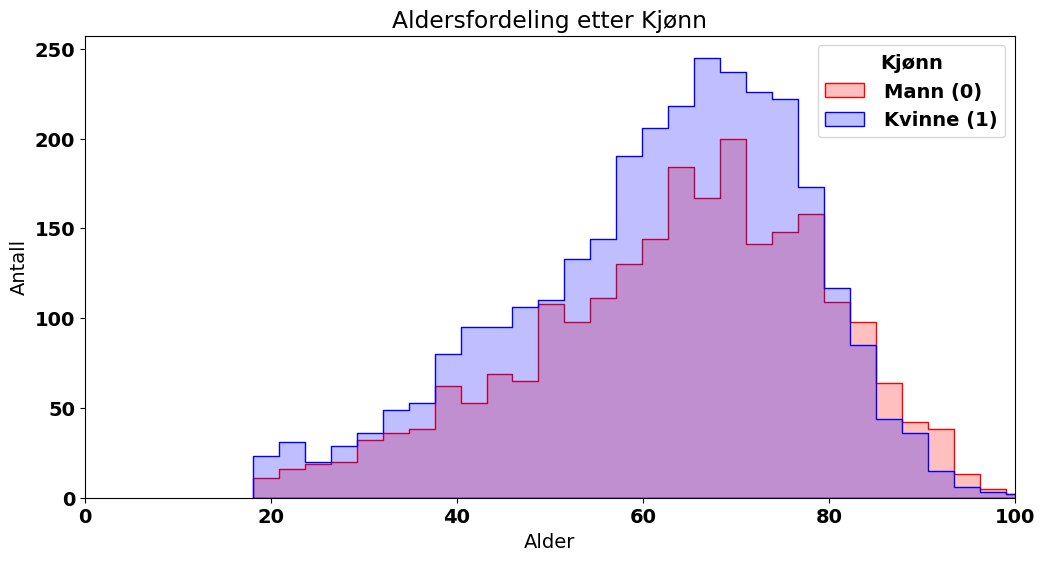

In [1686]:
# Aldersfordeling blant kjønnene

plt.figure(figsize=(12, 6))

sns.histplot(data=X_train, 
             x='alder', 
             hue=X_train['kjønn_female'].map({1: 'Kvinne', 0: 'Mann'}), 
             bins=30, 
             element='step', 
             stat='count', 
             common_norm=False, 
             palette={'Mann': 'blue', 'Kvinne': 'red'},
             hue_order=['Mann', 'Kvinne'])

plt.xlim(0, 100)

plt.title('Aldersfordeling etter Kjønn')
plt.xlabel('Alder')
plt.ylabel('Antall')

plt.legend(title='Kjønn', loc='upper right', labels=['Mann (0)', 'Kvinne (1)'], handletextpad=1, frameon=True)

plt.show()

#### Påvirker alder oppholdslengde?

Sektordiagrammet illustrerer dødlighet fordelt på aldersgrupper. Som forventet er dødligheten høyest blant de eldste pasientene. Det er imidlertid verdt å merke seg at forskjellen ikke er dramatisk store. Det kan tyde på at selv om alder er en faktor til dødlighet, er det andre variabler som også spiller en betydelig rolle. 

Vi undersøker videre for å forstå hvilke variabler dette er.

C:\Users\andre\AppData\Local\Temp\ipykernel_14456\1347577194.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\andre\AppData\Local\Temp\ipykernel_14456\1347577194.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

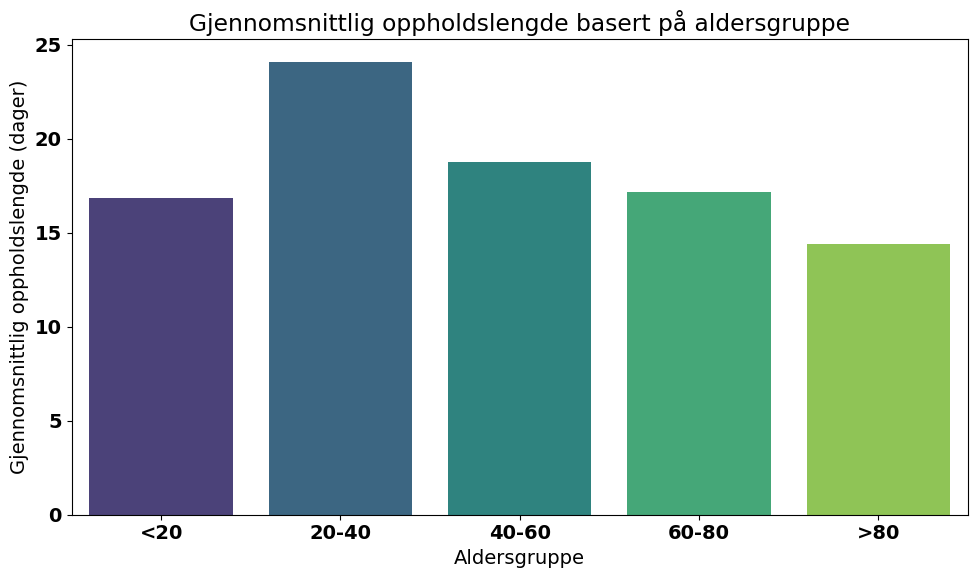

In [1687]:
# Oppholdslengde basert på alder.

alders_grupper = [-1, 20, 40, 60, 80, 100] 
navn_aldersgrupper = ['<20', '20-40', '40-60', '60-80', '>80']

X_train['alder_gruppe'] = pd.cut(X_train['alder'], bins=alders_grupper, labels=navn_aldersgrupper)

gjennomsnitt_oppholdslengde_per_aldergruppe = X_train.groupby('alder_gruppe').apply(
    lambda x: y_train[x.index].mean()
).reset_index(name='Gjennomsnittlig oppholdslengde')

plt.figure(figsize=(10, 6))
sns.barplot(data=gjennomsnitt_oppholdslengde_per_aldergruppe, x='alder_gruppe', y='Gjennomsnittlig oppholdslengde', palette='viridis')
plt.title('Gjennomsnittlig oppholdslengde basert på aldersgruppe')
plt.xlabel('Aldersgruppe')
plt.ylabel('Gjennomsnittlig oppholdslengde (dager)')
plt.tight_layout()
plt.show()

X_train.drop(columns=['alder_gruppe'], inplace=True)

#### Er ulike etnisiteter mer utsatt for enkelte sykdommer

Følgende funn er bemerkelsesverdige: 

* Det er en stor andel etnisitet_black som faller under sykdomskategori: sykdomskategori_COPD/CHF/Cirrhosis

* Det er en stor andel etnisitet_white som faller under sykdomskategori: sykdomskategori_cancer

* Det er en stor andel etnisitet_white som faller under sykdomskategori: sykdomskategori_coma

Dette er interessante funn, vi undersøker hva som kan være årsaken til disse funnene



#### Påvirker inntekt/velferd dødlighet (tilgang på bedre medisiner osv)?

Resultatet viser at inntekt ikke har stor innvirkning på overlevelse. 

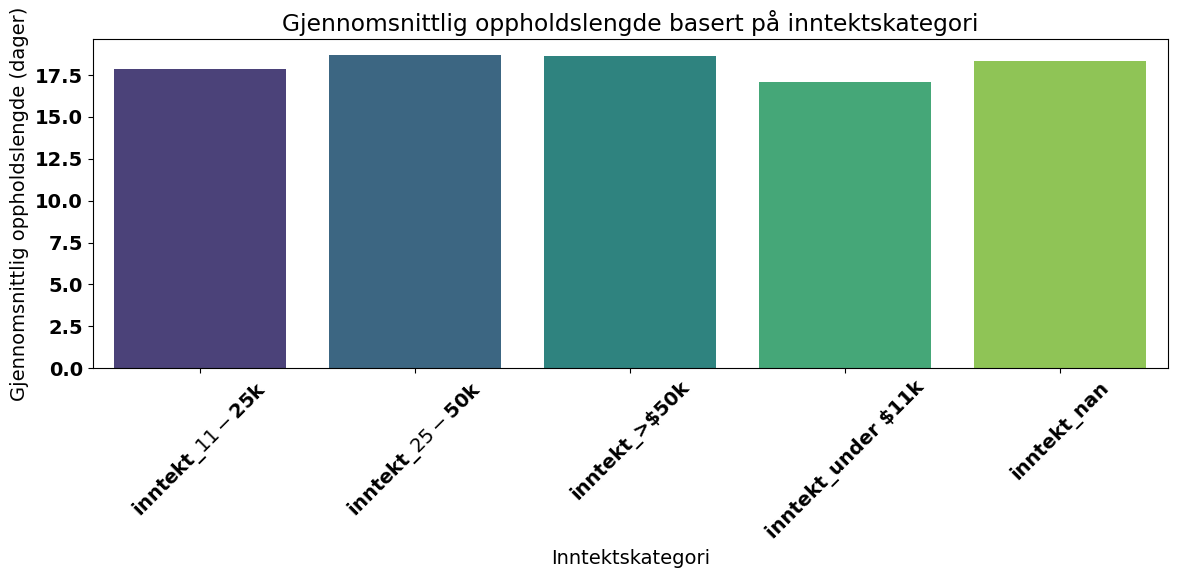

In [1688]:
# Påvirker inntekt oppholdslengde

inntektskategorier = [col for col in X_train.columns if 'inntekt' in col]

resultater = []

for inntekt in inntektskategorier:
    
    total = X_train[X_train[inntekt] == 1].shape[0]
    
    if total > 0:
        gjennomsnitt_oppholdslengde = y_train[X_train[inntekt] == 1].mean()
        resultater.append({'Inntektskategori': inntekt, 'Gjennomsnittlig oppholdslengde': gjennomsnitt_oppholdslengde})

resultater_df = pd.DataFrame(resultater)

plt.figure(figsize=(12, 6))
sns.barplot(data=resultater_df, x='Inntektskategori', y='Gjennomsnittlig oppholdslengde', palette='viridis')
plt.title('Gjennomsnittlig oppholdslengde basert på inntektskategori')
plt.xlabel('Inntektskategori')
plt.ylabel('Gjennomsnittlig oppholdslengde (dager)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Visualisering (sykdomsrelaterte variabler)

#### Oversikt over oppholdslengde blant alle pasientene

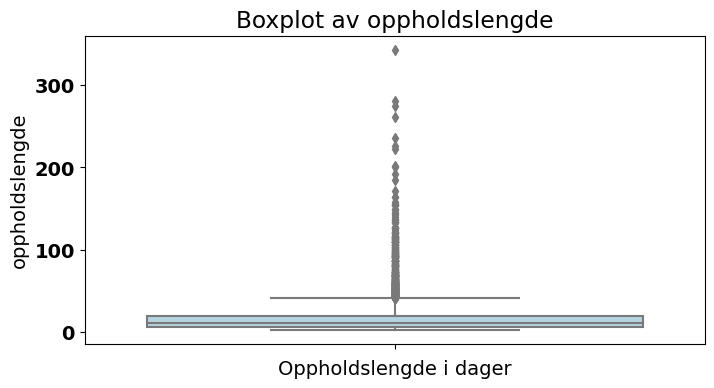

In [1689]:
# Oppholdslengde blant pasientene.

plt.figure(figsize=(8, 4))
sns.boxplot(y=y_train, color='lightblue')

plt.title('Boxplot av oppholdslengde')
plt.xlabel('Oppholdslengde i dager')
plt.show()

## Forekomst av sykdoms_underkategorier blant ulike etnisiteter

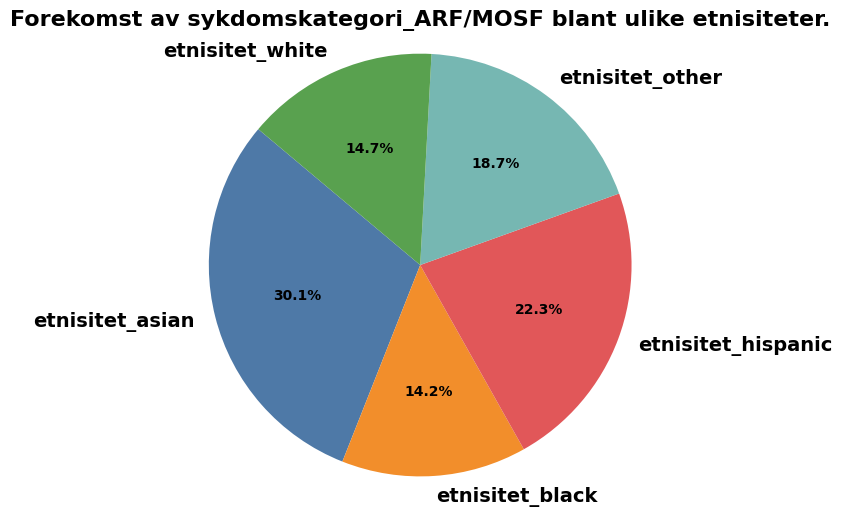

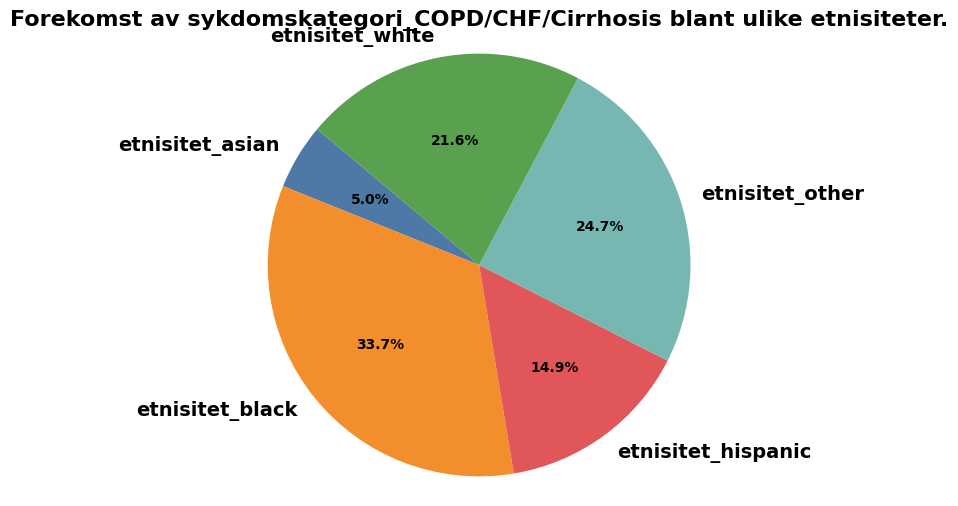

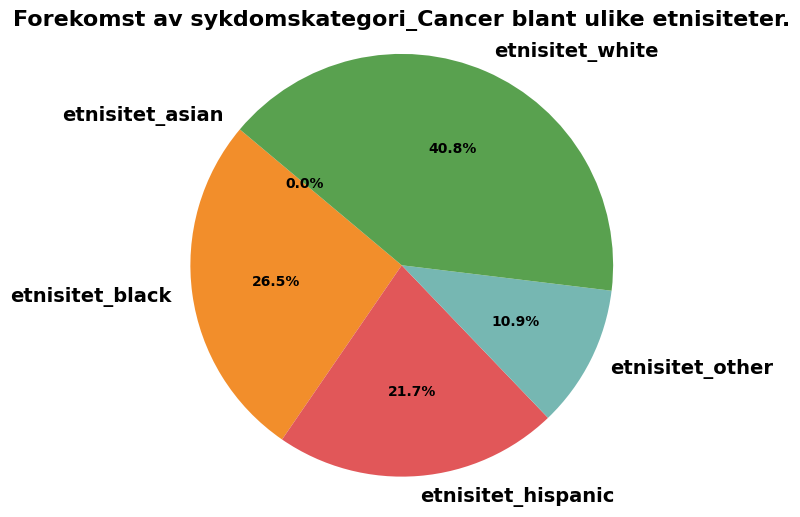

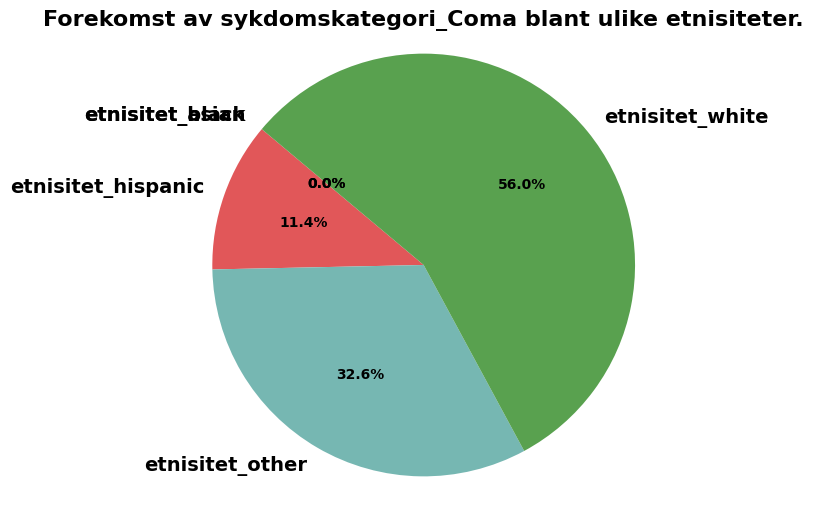

In [1690]:
# Forekomst av sykedomsunderkategorier blant ulike etnisiteter

colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']

ethnicities = ['etnisitet_asian', 'etnisitet_black', 'etnisitet_hispanic', 
               'etnisitet_other', 'etnisitet_white']
disease_categories = ['sykdomskategori_ARF/MOSF', 
                     'sykdomskategori_COPD/CHF/Cirrhosis', 
                     'sykdomskategori_Cancer', 
                     'sykdomskategori_Coma']

total_ethnicity_counts = X_train[ethnicities].sum()

plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'}) 

for disease in disease_categories:
    disease_data = X_train[X_train[disease] == 1][ethnicities].sum()

    percentage_data = (disease_data / total_ethnicity_counts) * 100
    
    plt.figure(figsize=(6, 6))
    
    wedges, texts, autotexts = plt.pie(percentage_data, labels=percentage_data.index, 
                                       autopct='%1.1f%%', startangle=140, 
                                       colors=colors, 
                                       textprops={'fontsize': 10})
    

    plt.title(f'Forekomst av {disease} blant ulike etnisiteter.', fontsize=16, fontweight='bold')
    

    plt.axis('equal') 
    
    for text in texts:
        text.set_fontsize(14)
        text.set_fontweight('bold')
    
    plt.show()

## Korrelasjonsmatrise over kun fysiologisk faktorer

Oversikt over variabler tilknyttet fysiologiske variabler kan hjelpe med å diagnosere og behandle pasienter på sykehuset. Man får en oversikt over hvilke variabler som henger sammen.

Av de fysiologiske variablene ser vi tydelig at kreatinin og blodurea_nitrogen korrelerer sterkt. (Dette er fordi begge er avfallsprodukter som dannes under metabolismen av protein og muskler, og de gir viktig informasjon om nyrefunksjonen.)

Kreatinin og blod_ph har en sterk negativ korrelasjon fordi nrår nyrefunksjonen svekkes, akkumuleres kreatinin i blodet.

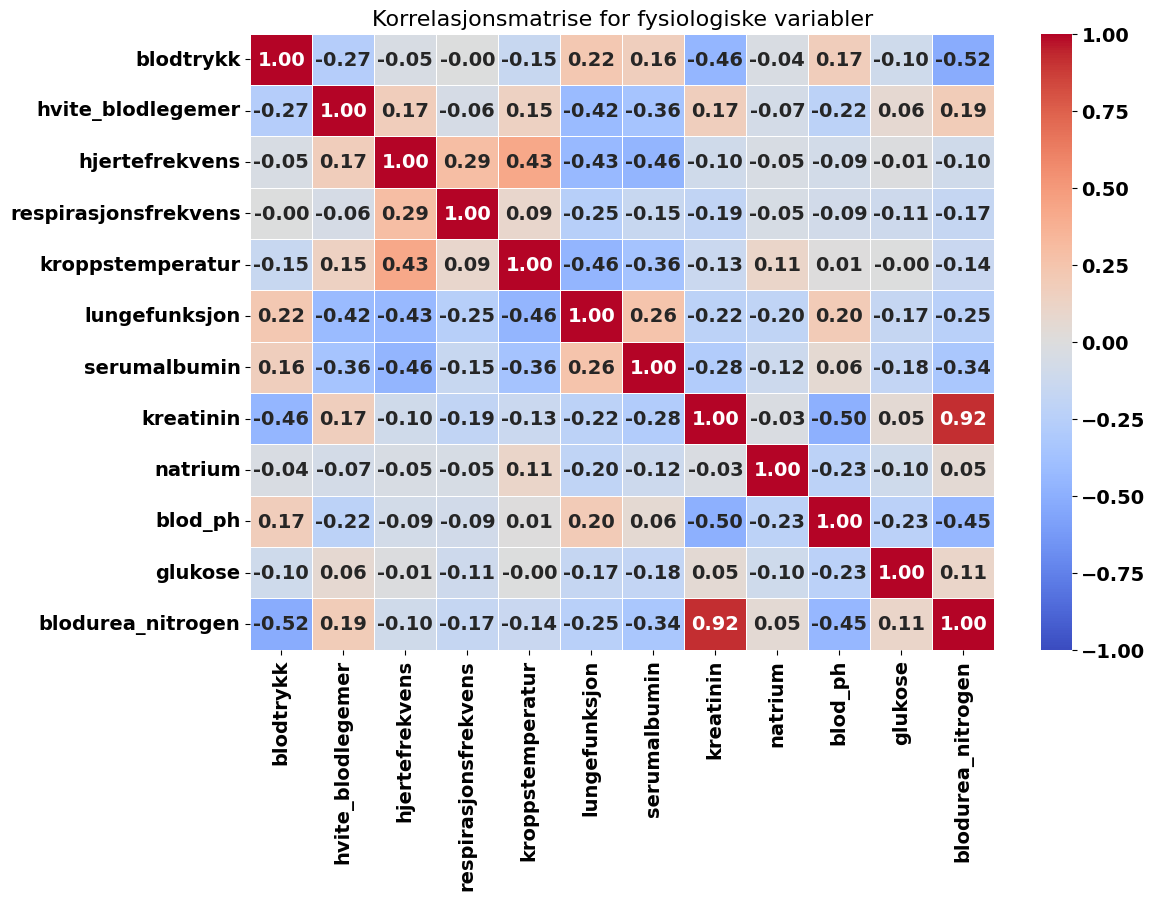

In [1691]:
# Korrelasjonsmatrise for fysiologiske variabler

phychological_columns =  [
    'blodtrykk', 'hvite_blodlegemer', 'hjertefrekvens', 
    'respirasjonsfrekvens', 'kroppstemperatur', 'lungefunksjon', 
    'serumalbumin', 'kreatinin', 'natrium', 
    'blod_ph', 'glukose', 'blodurea_nitrogen'
]

korrelasjons_matrise = X_train[phychological_columns].corr()
korrelasjons_matrise = korrelasjons_matrise.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(korrelasjons_matrise, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Korrelasjonsmatrise for fysiologiske variabler', fontsize=16)
plt.show()

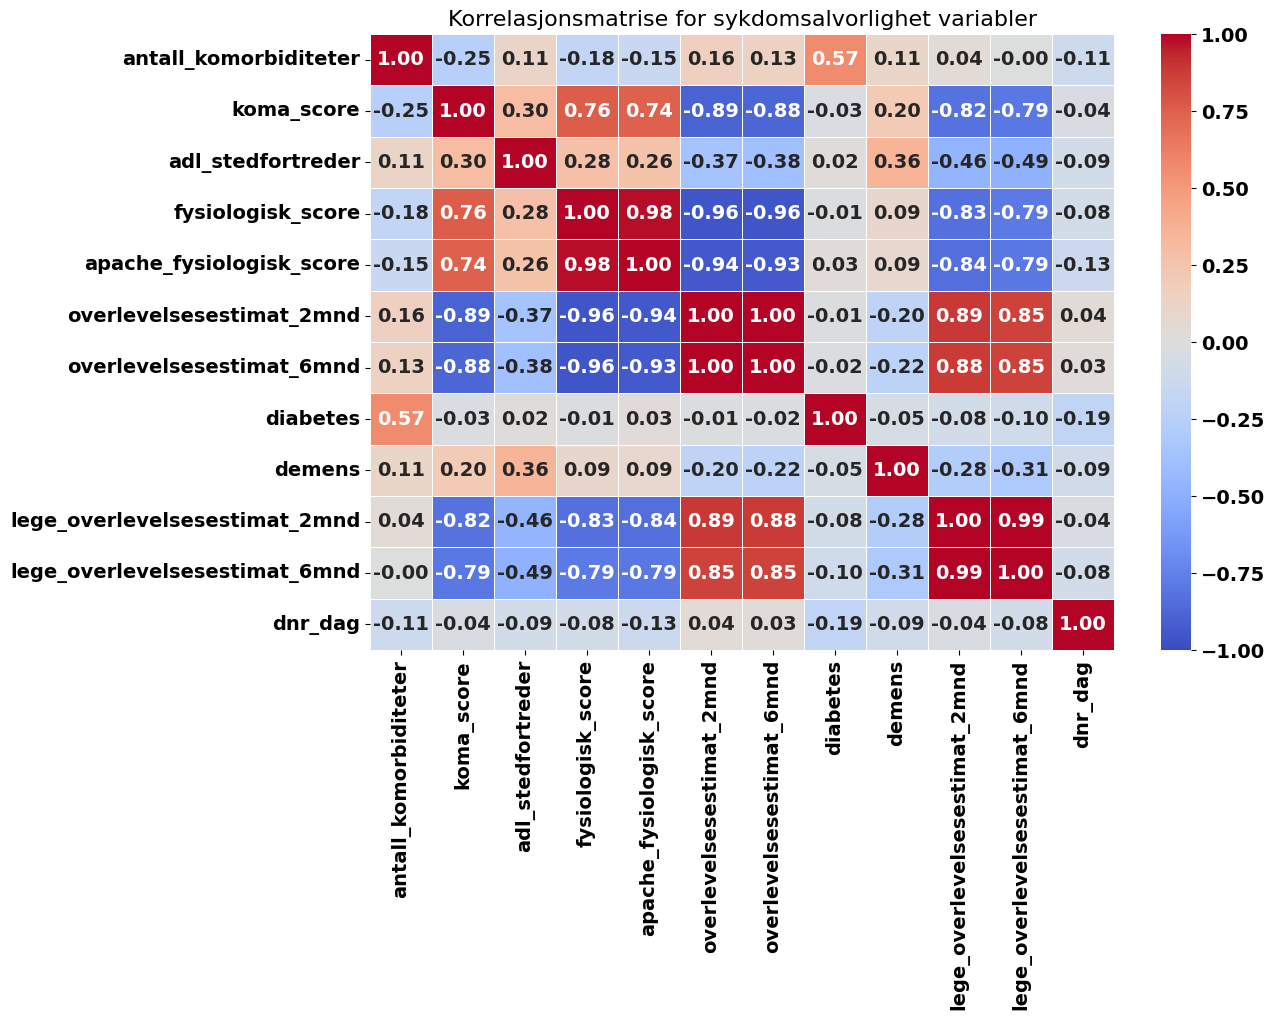

In [1692]:
# Korrelasjonsmatrise for variabler sykdomsalvorlighetsdata.

severity_columns = ['antall_komorbiditeter', 'koma_score',
       'adl_stedfortreder', 'fysiologisk_score', 'apache_fysiologisk_score',
       'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd', 'diabetes',
       'demens','lege_overlevelsesestimat_2mnd',
       'lege_overlevelsesestimat_6mnd', 'dnr_dag']

korrelasjons_matrise = X_train[severity_columns].corr()
korrelasjons_matrise = korrelasjons_matrise.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(korrelasjons_matrise, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Korrelasjonsmatrise for sykdomsalvorlighet variabler', fontsize=16)
plt.show()

In [1693]:
# Fra korrelasjonsmatrisen over merker vi oss variablene som korrelerer mer enn +-0.95.

høyt_korrelerende_variabler = ["lege_overlevelsesestimat_2mnd", "lege_overlevelsesestimat_6mnd", "apache_fysiologisk_score"]

X_train = X_train.drop(columns=høyt_korrelerende_variabler)
X_val = X_val.drop(columns=høyt_korrelerende_variabler)
X_test = X_test.drop(columns=høyt_korrelerende_variabler)

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



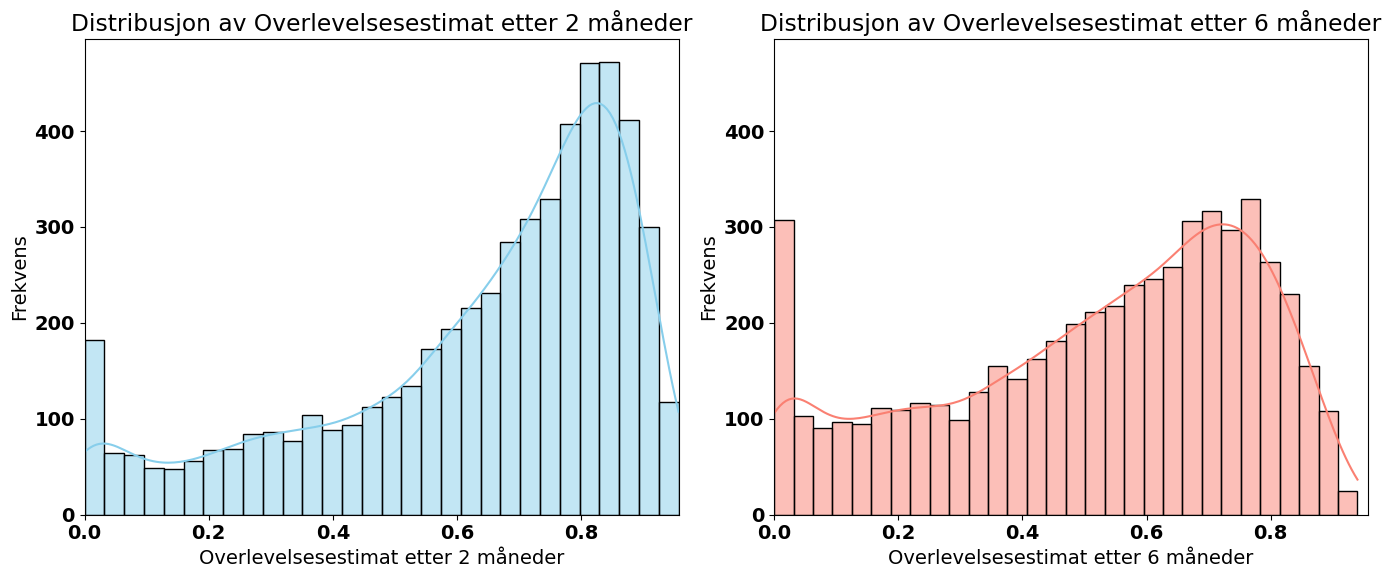

In [1694]:
# Oversikt over overlevelsesestimat blandt pasientene

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(X_train['overlevelsesestimat_2mnd'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribusjon av Overlevelsesestimat etter 2 måneder')
axes[0].set_xlabel('Overlevelsesestimat etter 2 måneder')
axes[0].set_ylabel('Frekvens')

sns.histplot(X_train['overlevelsesestimat_6mnd'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribusjon av Overlevelsesestimat etter 6 måneder')
axes[1].set_xlabel('Overlevelsesestimat etter 6 måneder')
axes[1].set_ylabel('Frekvens')

x_limits = (min(X_train['overlevelsesestimat_2mnd'].min(), X_train['overlevelsesestimat_6mnd'].min()), 
            max(X_train['overlevelsesestimat_2mnd'].max(), X_train['overlevelsesestimat_6mnd'].max()))
y_limits = (0, max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])) 

axes[0].set_xlim(x_limits)
axes[1].set_xlim(x_limits)
axes[0].set_ylim(y_limits)
axes[1].set_ylim(y_limits)

plt.tight_layout()
plt.show()

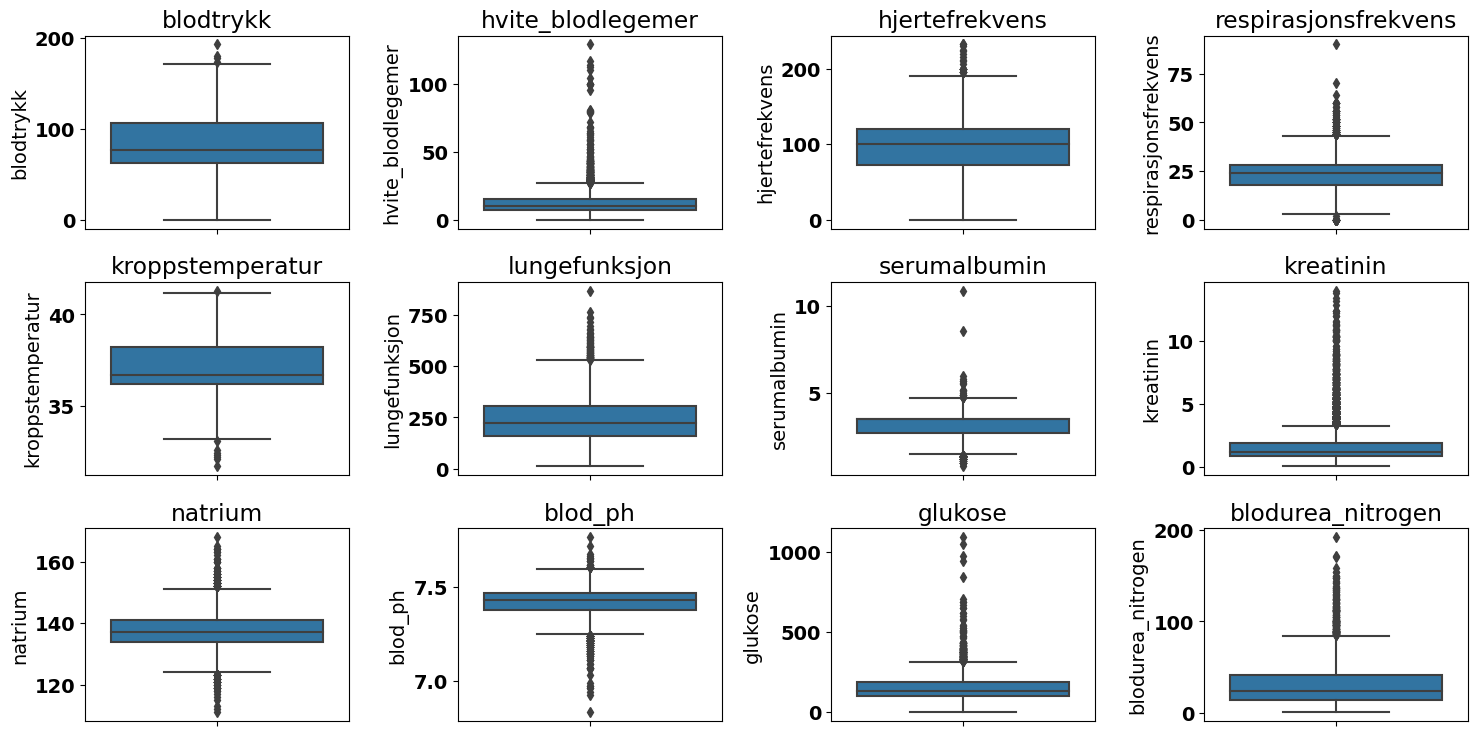

In [1695]:
# Undersøker uteliggere i fysiologisk data

phychological_columns =  [
    'blodtrykk', 'hvite_blodlegemer', 'hjertefrekvens', 
    'respirasjonsfrekvens', 'kroppstemperatur', 'lungefunksjon', 
    'serumalbumin', 'kreatinin', 'natrium', 
    'blod_ph', 'glukose', 'blodurea_nitrogen'
]

plt.figure(figsize=(15, 10))
for i, column in enumerate(phychological_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=X_train, y=column)
    plt.title(column)
plt.tight_layout()
plt.show()

In [1696]:
# I RAPPORTEN, ARGUMENTER FOR HVORFOR JEG VELGER Å IKKE FJERNE UTELIGGERE.
# MÅ TA HENSYN TIL PASIENTER MED SPESIELLE SYKDOMMER...

#uteliggere er ikke nødvendigvis feil informasjon, kan være pasienter med spesielle sykdommer som sørger for uteligger-verdier.
'''

z = 1.96

# Funksjon for å beregne og erstatte uteliggere med NaN
def replace_outliers_with_nan(df, columns):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        # Beregn 95% konfidensintervall
        lower_bound = mean - z * std
        upper_bound = mean + z * std
        
        # Erstatt verdier utenfor intervallet med NaN
        df[col] = df[col].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)
    
    return df

X_train = replace_outliers_with_nan(X_train, phychological_columns)
#X_val = replace_outliers_with_nan(X_val, phychological_columns)
#X_val = replace_outliers_with_nan(X_train, phychological_columns)

'''

'\n\nz = 1.96\n\n# Funksjon for å beregne og erstatte uteliggere med NaN\ndef replace_outliers_with_nan(df, columns):\n    for col in columns:\n        mean = df[col].mean()\n        std = df[col].std()\n        \n        # Beregn 95% konfidensintervall\n        lower_bound = mean - z * std\n        upper_bound = mean + z * std\n        \n        # Erstatt verdier utenfor intervallet med NaN\n        df[col] = df[col].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)\n    \n    return df\n\nX_train = replace_outliers_with_nan(X_train, phychological_columns)\n#X_val = replace_outliers_with_nan(X_val, phychological_columns)\n#X_val = replace_outliers_with_nan(X_train, phychological_columns)\n\n'

# Datarydding

Her må alle verdier som kan skape problemer for maskinlæringsmodellen fjernes. Det inkluderer: 

* Negative verdier
* Uteliggere --> behandles med medianverdier fordi robust mot uteliggere (behandles under "modellering")
* Sterkt korrelerende variabler
* Muligens NaN verdier (?) (både X_val og X_train, X_test inneholder ingen NaN verdier nå)

* Fjerne kolonner som ikke er relevante for å predikere oppholdslengde. Har funnet i visualiseringsdelen at utdanning ikke har ikke har stor innvirkning på sykdomskategori, derfor fjerner vi UTDANNING. Samme for ETNISITET, INNTEKT også???

* Skaler data (standardscaler eller minmaxscaler)
* Fjerne mål fra dag 7 og utover, se: https://git.app.uib.no/inf161/prosjekt/-/blob/master/README.md?ref_type=heads (adl_pasient, bilirubin)
* Fjerne "Lege_overlevelsesestimat" fordi det korrelerer med "overlevelsesetstimat" --> vise vha korrelasjonsmatrise
* Slå sammen / fjerne èn av apache_fysiologisk_score og fysiologisk_score. Disse variablene er like og korrelerer sterkt

In [1697]:
nan_counts = X_train.isna().sum()

nan_counts = nan_counts[nan_counts > 0]

if not nan_counts.empty:
    print("NaN verdier funnet i følgende kolonner:")
    print(nan_counts)
else:
    print("Ingen NaN verdier funnet i spesifiserte kolonner.")


NaN verdier funnet i følgende kolonner:
utdanning             962
lungefunksjon        1354
blod_ph              1336
glukose              2686
blodurea_nitrogen    2598
adl_stedfortreder    1714
dnr_dag              4642
dtype: int64


#### Fant ved bruk at "lege_overlevelsesestimat" korrelerer sterkt med "overlevelsesestimat (2 mnd og 6 mdn). Vi fjerner derfor lege_overlevelsesestimat for å unngå "overfitting". Fjerner også apache_fysiologisk_score. Forklar hva variablene er og hvorfor vi fjerner dem

In [1698]:
# Regn ut antall NaN-verdier for hver kolonne
nan_counts = X_train.isna().sum()

# Skriv ut antall NaN-verdier per kolonne
for kolonne, antall_nan in nan_counts.items():
    print(f'Antall NaN-verdier i kolonnen "{kolonne}": {antall_nan}')

X_train.head()

Antall NaN-verdier i kolonnen "alder": 0
Antall NaN-verdier i kolonnen "utdanning": 962
Antall NaN-verdier i kolonnen "blodtrykk": 0
Antall NaN-verdier i kolonnen "hvite_blodlegemer": 0
Antall NaN-verdier i kolonnen "hjertefrekvens": 0
Antall NaN-verdier i kolonnen "respirasjonsfrekvens": 0
Antall NaN-verdier i kolonnen "kroppstemperatur": 0
Antall NaN-verdier i kolonnen "lungefunksjon": 1354
Antall NaN-verdier i kolonnen "serumalbumin": 0
Antall NaN-verdier i kolonnen "kreatinin": 0
Antall NaN-verdier i kolonnen "natrium": 0
Antall NaN-verdier i kolonnen "blod_ph": 1336
Antall NaN-verdier i kolonnen "glukose": 2686
Antall NaN-verdier i kolonnen "blodurea_nitrogen": 2598
Antall NaN-verdier i kolonnen "urinmengde": 0
Antall NaN-verdier i kolonnen "antall_komorbiditeter": 0
Antall NaN-verdier i kolonnen "koma_score": 0
Antall NaN-verdier i kolonnen "adl_stedfortreder": 1714
Antall NaN-verdier i kolonnen "fysiologisk_score": 0
Antall NaN-verdier i kolonnen "overlevelsesestimat_2mnd": 0
An

,alder,utdanning,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde,antall_komorbiditeter,koma_score,adl_stedfortreder,fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,dnr_dag,kjønn_female,kjønn_male,inntekt_$11-$25k,inntekt_$25-$50k,inntekt_>$50k,inntekt_under $11k,inntekt_nan,etnisitet_asian,etnisitet_black,etnisitet_hispanic,etnisitet_other,etnisitet_white,etnisitet_nan,sykdomskategori_ARF/MOSF,sykdomskategori_COPD/CHF/Cirrhosis,sykdomskategori_Cancer,sykdomskategori_Coma,sykdom_underkategori_ARF/MOSF w/Sepsis,sykdom_underkategori_CHF,sykdom_underkategori_COPD,sykdom_underkategori_Cirrhosis,sykdom_underkategori_Colon Cancer,sykdom_underkategori_Coma,sykdom_underkategori_Lung Cancer,sykdom_underkategori_MOSF w/Malig,kreft_metastatic,kreft_no,kreft_yes,dnr_status_dnr før innleggelse,dnr_status_dnr ved innleggelse,dnr_status_None
0,19.14899,11.0,79.0,7.599609,92.0,26.0,39.00000,NaN,3.0,2.099609,139.0,NaN,99.0,21.0,2425.0,3,9.0,NaN,22.699219,0.617920,0.431946,1,0,NaN,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,77.74695,NaN,89.0,19.296875,80.0,18.0,36.89844,NaN,3.5,1.299805,133.0,NaN,NaN,NaN,2502.0,0,0.0,1.0,24.199219,0.775879,0.703979,0,0,NaN,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,63.02499,NaN,124.0,13.000000,126.0,32.0,38.19531,NaN,3.5,1.899902,140.0,NaN,NaN,NaN,2502.0,3,0.0,6.0,31.296875,0.590942,0.399963,1,0,-1.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,64.07898,14.0,76.0,9.000000,93.0,16.0,36.29688,NaN,3.5,1.010000,140.0,NaN,NaN,NaN,2502.0,2,0.0,NaN,12.398438,0.785889,0.550903,0,0,NaN,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
4,19.21399,12.0,108.0,6.599609,115.0,6.0,36.29688,171.40625,3.5,0.699951,134.0,7.30957,125.0,22.0,2270.0,1,0.0,0.0,17.296875,0.917969,0.861938,0,0,NaN,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


# Del 2 - modellering

In [1699]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [1700]:
'''
# Funksjon for å fylle NaN-verdier med forskjellige strategier
def fill_na_with_strategy(X, strategy):
    X_filled = X.copy()
    for column in X_filled.columns:
        if strategy == 'mean':
            fill_value = X_filled[column].mean()
        elif strategy == 'median':
            fill_value = X_filled[column].median()
        elif strategy == 'mode':
            fill_value = X_filled[column].mode()[0]  # Tar første modus hvis flere
        else:
            raise ValueError("Ugyldig strategi")
        
        X_filled[column].fillna(fill_value, inplace=True)
    return X_filled

# Liste over strategier
strategies = ['mean', 'median', 'mode']

# Initialize results list
results = []

# Definer modellene
models = {
    'Linear Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Ridge Regression': make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0)),
    'Lasso Regression': make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=0.1)),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Elastic Net': make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=0.1, l1_ratio=0.5))
}

# Iterer gjennom hver strategi
for strategy in strategies:
    # Fyll NaN-verdier i treningssettet med valgt strategi
    X_train_filled = fill_na_with_strategy(X_train, strategy)

    # Fyll NaN-verdier i valideringssettet med strategien fra treningssettet
    X_val_filled = fill_na_with_strategy(X_val, strategy)

    # Tren og evaluer hver modell
    for model_name, model in models.items():
        model.fit(X_train_filled, y_train)
        pred = model.predict(X_val_filled)
        rmse = np.round(np.sqrt(mean_squared_error(y_val, pred)), decimals=2)
        results.append((strategy, model_name, rmse))

# Print resultatene
for strategy, model_name, rmse in results:
    print(f'Strategi: {strategy}, Modell: {model_name}, RMSE: {rmse}')
'''


'\n# Funksjon for å fylle NaN-verdier med forskjellige strategier\ndef fill_na_with_strategy(X, strategy):\n    X_filled = X.copy()\n    for column in X_filled.columns:\n        if strategy == \'mean\':\n            fill_value = X_filled[column].mean()\n        elif strategy == \'median\':\n            fill_value = X_filled[column].median()\n        elif strategy == \'mode\':\n            fill_value = X_filled[column].mode()[0]  # Tar første modus hvis flere\n        else:\n            raise ValueError("Ugyldig strategi")\n        \n        X_filled[column].fillna(fill_value, inplace=True)\n    return X_filled\n\n# Liste over strategier\nstrategies = [\'mean\', \'median\', \'mode\']\n\n# Initialize results list\nresults = []\n\n# Definer modellene\nmodels = {\n    \'Linear Regression\': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),\n    \'Ridge Regression\': make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0)),\n    \'Lasso Regression\': make_pipeline(Polyno

## Neste steg 

* Oppdatere datavisualiseringer (ytte ut visualiseringer med "dødlghet", da dette ikke er relevant lenger)
* Oppdatere rapporten henholdsvis
* Fikse strukturen på .ipynb fielen (rotete nå)
* Kommentere på de nye stegene jeg har gjort
* Se på generaliseringsevne
* I rapporten: argumentere for hvorfor jeg bruker disse modellene
* Forklare hvorfor man definerer baseline modell
* FInn ut hvorfor X_val og y_val har 1159 og ikke 1160

In [1701]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

## Baseline modell

Å definere en grunnlinjemodell er en viktig del av modellutviklingsporsessen. Grunnlinjemodellen gir deg en referanse for å vurdere hvor godt de mer avanserte modellene dine presterer.

Grunnlinjemodellen gir en enkel og rask måte å få en grov prediksjon. Den predikerer bare gjennomsnittsverdien av målet for alle datapiunker i treningsettet. Hvis de mer avanserte moelldene dine ikke klarer å slå denne enkle baseline-modellen, indikerer det at de kanskje ikke er bedre enn å bruke en enkel gjennoomsnittsverdi. Modellen bruker minimalt med ressurser.

Siden modellene vi trener er bedre, viser det at vi har gjort en grei jobb

In [1702]:

# Funksjon for å beregne RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

baseline = DummyRegressor(strategy="median") # modellen imputerer alltid medianverdien av den avhengige variabelen.

baseline.fit(X_train, y_train)  # Tilpasser modellen til treningsdata
prediction = baseline.predict(X_val)  # Predikerer med baseline på valideringsdata
rmse_baseline = root_mean_squared_error(y_val, prediction)  # Beregner RMSE
print(f'RMSE for baseline: {rmse_baseline}')


RMSE for baseline: 21.474486738290018


In [1703]:

# For å kunne bruke pipeline i RandomizedSearchCV
pipeline = Pipeline([
    ('strat', 'passthrough'),  # Placeholder for imputers
    ('scaler', 'passthrough'), # Placeholder for scalers
    ('model', 'passthrough')   # Placeholder for modeller
])


# Gradient Boosting params
gradient_boosting_params = [
    {
        'strat': [SimpleImputer()], # spesifikt verktøy for å erstatte NaN verdier med spesifisert statistikk for den aktuelle kolonnen.
        'strat__strategy': ['mean', 'median'],
        'scaler': [StandardScaler()],
        'model': [GradientBoostingRegressor()],
        'model__n_estimators': [100, 200, 500],
        'model__learning_rate': [0.01, 0.1, 0.05],
        'model__max_depth': [3, 5, 7]
    },
    {
        'strat': [KNNImputer()], # spesifikt verktøy for å erstatte NaN verdier med spesifisert statistikk for den aktuelle kolonnen.
        'strat__n_neighbors': [3, 5],
        'scaler': [StandardScaler()],
        'model': [GradientBoostingRegressor()],
        'model__n_estimators': [100, 200, 500],
        'model__learning_rate': [0.01, 0.1, 0.05],
        'model__max_depth': [3, 5, 7]
    }
]

# Randomized Search for Gradient Boosting
gb_search = RandomizedSearchCV(pipeline, gradient_boosting_params, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1, random_state=42)
gb_search.fit(X_train, y_train)


# Få beste modell og hyperparametere
best_gb = gb_search.best_estimator_
print(f"Beste hyperparametere for GradientBoosting: {gb_search.best_params_}")
gb_rmse = root_mean_squared_error(y_val, best_gb.predict(X_val))
print(f"Beste RMSE for GradientBoosting: {gb_rmse}")


Beste hyperparametere for GradientBoosting: {'strat__strategy': 'mean', 'strat': SimpleImputer(), 'scaler': StandardScaler(), 'model__n_estimators': 500, 'model__max_depth': 3, 'model__learning_rate': 0.01, 'model': GradientBoostingRegressor()}
Beste RMSE for GradientBoosting: 20.28510372203365


In [1704]:

from sklearn.ensemble import RandomForestRegressor

# Hyperparametere for Random Forest
random_forest_params = [
    {
        'strat': [SimpleImputer()],
        'strat__strategy': ['mean', 'median'],
        'scaler': [StandardScaler()],
        'model': [RandomForestRegressor()],
        'model__n_estimators': [100, 200, 500],
        'model__max_depth': [5, 10, 15],
        'model__min_samples_split': [2, 5, 10]
    },
    {
        'strat': [KNNImputer()],
        'strat__n_neighbors': [3, 5],
        'scaler': [StandardScaler()],
        'model': [RandomForestRegressor()],
        'model__n_estimators': [100, 200, 500],
        'model__max_depth': [5, 10, 15],
        'model__min_samples_split': [2, 5, 10]
    }
]

# Randomized Search for Random Forest
rf_search = RandomizedSearchCV(pipeline, random_forest_params, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)


# Få beste modell og hyperparametere
best_rf = rf_search.best_estimator_
print(f"Beste hyperparametere for RandomForest: {rf_search.best_params_}")
rf_rmse = root_mean_squared_error(y_val, best_rf.predict(X_val))
print(f"Beste RMSE for RandomForest: {rf_rmse}")


Beste hyperparametere for RandomForest: {'strat__strategy': 'mean', 'strat': SimpleImputer(), 'scaler': StandardScaler(), 'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__max_depth': 5, 'model': RandomForestRegressor()}
Beste RMSE for RandomForest: 20.079217224901658


In [1705]:

from sklearn.linear_model import ElasticNet

# Hyperparametere for Elastic Net
elastic_net_params = [
    {
        'strat': [SimpleImputer()],
        'strat__strategy': ['mean', 'median'],
        'scaler': [StandardScaler()],
        'model': [ElasticNet()],
        'model__alpha': [0.1, 0.5, 1.0],
        'model__l1_ratio': [0.1, 0.5, 0.9]
    },
    {
        'strat': [KNNImputer()],
        'strat__n_neighbors': [3, 5],
        'scaler': [StandardScaler()],
        'model': [ElasticNet()],
        'model__alpha': [0.1, 0.5, 1.0],
        'model__l1_ratio': [0.1, 0.5, 0.9]
    }
]

# Randomized Search for Elastic Net
en_search = RandomizedSearchCV(pipeline, elastic_net_params, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1, random_state=42)

en_search.fit(X_train, y_train)


# Få beste modell og hyperparametere
best_en = en_search.best_estimator_
print(f"Beste hyperparametere for ElasticNet: {en_search.best_params_}")
en_rmse = root_mean_squared_error(y_val, best_en.predict(X_val))
print(f"Beste RMSE for ElasticNet: {en_rmse}")


Beste hyperparametere for ElasticNet: {'strat__n_neighbors': 3, 'strat': KNNImputer(), 'scaler': StandardScaler(), 'model__l1_ratio': 0.5, 'model__alpha': 0.5, 'model': ElasticNet()}
Beste RMSE for ElasticNet: 20.260246380145464


In [1722]:

# Konverter listen til en DataFrame
rmse_df = pd.DataFrame(model_results)

# Sorter DataFrame etter RMSE i stigende rekkefølge
rmse_df = rmse_df.sort_values(by='RMSE').reset_index(drop=True)

# Vis DataFrame
print(rmse_df)


              Model       RMSE
0      RandomForest  20.079217
1        ElasticNet  20.260246
2  GradientBoosting  20.285104
3          Baseline  21.474487


### Sjekker for beste modell

In [1706]:

# Anta at du har disse modellene fra tidligere eksperimenter
models = {
    'elastic_net': best_en,  # ElasticNet-modellen du trente
    'gradient_boosting': best_gb,  # Gradient Boosting-modellen du trente
    'random_forest': best_en,  # Random Forest-modellen du trente
    'baseline': baseline
}

# RMSE-verdier for modellene
RMSE_models = {
    'elastic_net': en_rmse,
    'gradient_boosting': gb_rmse,
    'random_forest': rf_rmse
}

# Finn modellen med lavest RMSE
optimal_rmse = None
optimal_model_name = ''

for model_name, rmse in RMSE_models.items():
    if optimal_rmse is None or rmse < optimal_rmse:
        optimal_rmse = rmse
        optimal_model_name = model_name

# Hent den faktiske modellen fra 'models' dictionary
optimal_model = models[optimal_model_name]

print(f"Beste modell: {optimal_model_name} med RMSE: {optimal_rmse}")


Beste modell: elastic_net med RMSE: 20.260246380145464


In [1723]:
prediksjoner = optimal_model.predict(X_test)

test_rmse = mean_squared_error(y_test, prediksjoner, squared=False)
print(f"Test RMSE for {optimal_model_name}: {test_rmse}")


Pipeline(steps=[('strat', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()),
                ('model', ElasticNet(alpha=0.5))])


C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but KNNImputer was fitted without feature names



Test RMSE for elastic_net: 21.876988945574993


C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [1708]:

# Kombiner trenings- og valideringsdata til en større datasett
X_train_combined = np.concatenate([X_train, X_val], axis=0)
y_train_combined = np.concatenate([y_train, y_val], axis=0)

# Tren den beste modellen på det kombinerte settet
optimal_model.fit(X_train_combined, y_train_combined)
optimal_model


Pipeline(steps=[('strat', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()),
                ('model', ElasticNet(alpha=0.5))])

In [1709]:

test_rmse = mean_squared_error(y_test, best_en.predict(X_test), squared=False)
print(f"Test RMSE: {test_rmse}")


C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but KNNImputer was fitted without feature names



Test RMSE: 21.876988945574993


C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [1710]:
#lagrer modellen til brukk i app.py
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(en_search, f)

### Predikere oppholdslengde blant pasienter i Sampledata

Samme behandling som i raw_data

In [1711]:
demographic_sample_df = pd.read_csv("./sample_data/demographic.csv")
hospital_sample_df = pd.read_csv("./sample_data/hospital.csv")
physiological_sample_df = pd.read_csv("./sample_data/physiological.txt", sep="\t")
severity_sample_df = pd.read_json("./sample_data/severity.json")

In [1712]:
physiological_sample_df["serumalbumin"].fillna(3.5,inplace=True)
physiological_sample_df["bilirubin"].fillna(1.01,inplace=True)
physiological_sample_df["kreatinin"].fillna(1.01,inplace=True) # creatinine (crea)
physiological_sample_df["hvite_blodlegemer"].fillna(9,inplace=True) # white bloog count
physiological_sample_df["urinmengde"].fillna(2502,inplace=True) # urine output (urine)

C:\Users\andre\AppData\Local\Temp\ipykernel_14456\190445517.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\andre\AppData\Local\Temp\ipykernel_14456\190445517.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [1713]:
columns_to_list = severity_sample_df.columns.to_list()
valid_columns = columns_to_list[2:]
severity_sample_df = severity_sample_df.explode(valid_columns, ignore_index=True)

In [1714]:
demographic_sample_df = demographic_sample_df.drop_duplicates()

# Tilbakestiller indeksene.

demographic_sample_df = demographic_sample_df.reset_index(drop=True)
hospital_sample_df = hospital_sample_df.reset_index(drop=True).drop(columns=['pasient_id'])
physiological_sample_df = physiological_sample_df.reset_index(drop=True).drop(columns=['pasient_id'])
severity_sample_df = severity_sample_df.reset_index(drop=True).drop(columns=['pasient_id'])

# Slår så sammen datasettene til et stort datasett: df
df_sample = pd.concat([demographic_sample_df, hospital_sample_df, physiological_sample_df, severity_sample_df], axis=1)

In [1715]:
df_sample.head()

,pasient_id,alder,kjønn,utdanning,inntekt,etnisitet,sykehusdød,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,bilirubin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde,sykdomskategori_id,sykdomskategori,dødsfall,sykdom_underkategori,antall_komorbiditeter,koma_score,adl_pasient,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,kreft,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_status,dnr_dag
0,1,62.84998,male,11.0,$11-$25k,other,0,97.0,6.000000,69.0,22.0,36.00000,388.000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,NaN,2502.0,A1s,ARF/MOSF,0,ARF/MOSF w/Sepsis,2,37.0,None,None,22.398438,21.0,0.823975,0.764893,0,0,no,None,None,no dnr,10.0
1,22,48.70398,male,16.0,NaN,other,0,66.0,12.500000,125.0,30.0,37.00000,170.000,3.500000,1.010000,1.000000,133.0,7.519531,NaN,NaN,2502.0,A1s,ARF/MOSF,1,MOSF w/Malig,2,26.0,None,0.0,36.09375,78.0,0.171997,0.08699,0,0,yes,0.1,0.001,no dnr,21.0
2,25,29.36099,female,17.0,$25-$50k,white,0,96.0,10.599609,112.0,20.0,37.00000,NaN,3.699707,1.399902,0.599976,137.0,NaN,NaN,NaN,2502.0,A1s,ARF/MOSF,1,ARF/MOSF w/Sepsis,1,0.0,None,0.0,26.0,32.0,0.738892,0.657959,0,0,no,0.9,0.9,no dnr,61.0
3,26,53.84000,male,NaN,under $11k,white,0,134.0,7.799805,106.0,22.0,37.89844,304.125,3.799805,0.500000,0.799927,141.0,7.379883,NaN,NaN,2502.0,A1s,ARF/MOSF,1,ARF/MOSF w/Sepsis,2,37.0,None,None,21.5,30.0,0.642944,0.541992,0,1,no,None,None,dnr ved innleggelse,4.0
4,29,30.10799,male,NaN,NaN,asian,0,92.0,8.798828,112.0,27.0,37.59375,225.000,3.500000,1.010000,0.399963,134.0,7.459961,NaN,NaN,2502.0,A1s,ARF/MOSF,0,ARF/MOSF w/Sepsis,1,9.0,None,None,31.097656,48.0,0.703979,0.61499,0,0,no,0.1,0.001,no dnr,120.0


In [1716]:
# One hot encoding på sample data.

cols_to_encode_sample = ["kjønn", "inntekt", "etnisitet", "sykdomskategori", "sykdom_underkategori", "kreft", "dnr_status"]

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_data = one_hot_encoder.fit_transform(df_sample[cols_to_encode_sample])

encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(cols_to_encode_sample))

df_sample_encoded = pd.concat([df_sample.drop(columns=cols_to_encode_sample), encoded_df], axis=1)

df_sample_encoded.head()

,pasient_id,alder,utdanning,sykehusdød,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,bilirubin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde,sykdomskategori_id,dødsfall,antall_komorbiditeter,koma_score,adl_pasient,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_dag,kjønn_female,kjønn_male,inntekt_$11-$25k,inntekt_$25-$50k,inntekt_>$50k,inntekt_under $11k,inntekt_nan,etnisitet_asian,etnisitet_black,etnisitet_hispanic,etnisitet_other,etnisitet_white,etnisitet_nan,sykdomskategori_ARF/MOSF,sykdomskategori_COPD/CHF/Cirrhosis,sykdomskategori_Cancer,sykdomskategori_Coma,sykdom_underkategori_ARF/MOSF w/Sepsis,sykdom_underkategori_CHF,sykdom_underkategori_COPD,sykdom_underkategori_Cirrhosis,sykdom_underkategori_Colon Cancer,sykdom_underkategori_Coma,sykdom_underkategori_Lung Cancer,sykdom_underkategori_MOSF w/Malig,kreft_metastatic,kreft_no,kreft_yes,dnr_status_dnr før innleggelse,dnr_status_dnr ved innleggelse,dnr_status_no dnr,dnr_status_None
0,1,62.84998,11.0,0,97.0,6.000000,69.0,22.0,36.00000,388.000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,NaN,2502.0,A1s,0,2,37.0,None,None,22.398438,21.0,0.823975,0.764893,0,0,None,None,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,22,48.70398,16.0,0,66.0,12.500000,125.0,30.0,37.00000,170.000,3.500000,1.010000,1.000000,133.0,7.519531,NaN,NaN,2502.0,A1s,1,2,26.0,None,0.0,36.09375,78.0,0.171997,0.08699,0,0,0.1,0.001,21.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,25,29.36099,17.0,0,96.0,10.599609,112.0,20.0,37.00000,NaN,3.699707,1.399902,0.599976,137.0,NaN,NaN,NaN,2502.0,A1s,1,1,0.0,None,0.0,26.0,32.0,0.738892,0.657959,0,0,0.9,0.9,61.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,26,53.84000,NaN,0,134.0,7.799805,106.0,22.0,37.89844,304.125,3.799805,0.500000,0.799927,141.0,7.379883,NaN,NaN,2502.0,A1s,1,2,37.0,None,None,21.5,30.0,0.642944,0.541992,0,1,None,None,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,29,30.10799,NaN,0,92.0,8.798828,112.0,27.0,37.59375,225.000,3.500000,1.010000,0.399963,134.0,7.459961,NaN,NaN,2502.0,A1s,0,1,9.0,None,None,31.097656,48.0,0.703979,0.61499,0,0,0.1,0.001,120.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1717]:
df_sample_encoded[['dødsfall','antall_komorbiditeter' ,'koma_score' ,'adl_pasient' ,'adl_stedfortreder' ,'fysiologisk_score' ,'apache_fysiologisk_score', 'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd','diabetes', 'demens', 'lege_overlevelsesestimat_2mnd','lege_overlevelsesestimat_6mnd', 'dnr_dag']] = df_sample_encoded[['dødsfall', 'antall_komorbiditeter', 'koma_score', 'adl_pasient', 'adl_stedfortreder', 'fysiologisk_score','apache_fysiologisk_score' ,'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd','diabetes', 'demens','lege_overlevelsesestimat_2mnd','lege_overlevelsesestimat_6mnd', 'dnr_dag']].apply(pd.to_numeric)

In [1718]:
irrelevant_columns = ["dødsfall", "pasient_id", "sykehusdød", "adl_pasient", "bilirubin", "sykdomskategori_id", "lege_overlevelsesestimat_2mnd", "lege_overlevelsesestimat_6mnd", "apache_fysiologisk_score", 'dnr_status_no dnr']

df_sample_encoded = df_sample_encoded.drop(columns=irrelevant_columns, axis=1)

In [1719]:
# Predikerer oppholdslengde i sample data og lagrer i csv-fil.
predicted_oppholdslengde = optimal_model.predict(df_sample_encoded)

df_predictions = df_sample_encoded.copy()

df_predictions['predikert_oppholdslengde'] = predicted_oppholdslengde

df_predictions.to_csv("sample_data_predikert_oppholdslengde.csv", index=False)

print("Predictions saved to sample_data_predikert_oppholdslengde.csv")

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but KNNImputer was fitted without feature names



Predictions saved to sample_data_predikert_oppholdslengde.csv


In [1720]:
df_predictions.head()

,alder,utdanning,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde,antall_komorbiditeter,koma_score,adl_stedfortreder,fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,dnr_dag,kjønn_female,kjønn_male,inntekt_$11-$25k,inntekt_$25-$50k,inntekt_>$50k,inntekt_under $11k,inntekt_nan,etnisitet_asian,etnisitet_black,etnisitet_hispanic,etnisitet_other,etnisitet_white,etnisitet_nan,sykdomskategori_ARF/MOSF,sykdomskategori_COPD/CHF/Cirrhosis,sykdomskategori_Cancer,sykdomskategori_Coma,sykdom_underkategori_ARF/MOSF w/Sepsis,sykdom_underkategori_CHF,sykdom_underkategori_COPD,sykdom_underkategori_Cirrhosis,sykdom_underkategori_Colon Cancer,sykdom_underkategori_Coma,sykdom_underkategori_Lung Cancer,sykdom_underkategori_MOSF w/Malig,kreft_metastatic,kreft_no,kreft_yes,dnr_status_dnr før innleggelse,dnr_status_dnr ved innleggelse,dnr_status_None,predikert_oppholdslengde
0,62.84998,11.0,97.0,6.000000,69.0,22.0,36.00000,388.000,1.799805,1.199951,141.0,7.459961,NaN,NaN,2502.0,2,37.0,NaN,22.398438,0.823975,0.764893,0,0,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.870158
1,48.70398,16.0,66.0,12.500000,125.0,30.0,37.00000,170.000,3.500000,1.000000,133.0,7.519531,NaN,NaN,2502.0,2,26.0,0.0,36.093750,0.171997,0.086990,0,0,21.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,19.226358
2,29.36099,17.0,96.0,10.599609,112.0,20.0,37.00000,NaN,3.699707,0.599976,137.0,NaN,NaN,NaN,2502.0,1,0.0,0.0,26.000000,0.738892,0.657959,0,0,61.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.255716
3,53.84000,NaN,134.0,7.799805,106.0,22.0,37.89844,304.125,3.799805,0.799927,141.0,7.379883,NaN,NaN,2502.0,2,37.0,NaN,21.500000,0.642944,0.541992,0,1,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,17.358894
4,30.10799,NaN,92.0,8.798828,112.0,27.0,37.59375,225.000,3.500000,0.399963,134.0,7.459961,NaN,NaN,2502.0,1,9.0,NaN,31.097656,0.703979,0.614990,0,0,120.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,21.103537


In [1721]:

'''
binary_columns = [
    'kjønn_female', 'kjønn_male',
    'inntekt_$11-$25k', 'inntekt_$25-$50k', 'inntekt_>$50k', 'inntekt_under $11k', 'inntekt_nan',
    'etnisitet_asian', 'etnisitet_black', 'etnisitet_hispanic', 'etnisitet_other', 
    'etnisitet_white', 'etnisitet_nan',
    'sykdomskategori_ARF/MOSF', 'sykdomskategori_COPD/CHF/Cirrhosis', 
    'sykdomskategori_Cancer', 'sykdomskategori_Coma',
    'sykdom_underkategori_ARF/MOSF w/Sepsis', 'sykdom_underkategori_CHF', 
    'sykdom_underkategori_COPD', 'sykdom_underkategori_Cirrhosis', 
    'sykdom_underkategori_Colon Cancer', 'sykdom_underkategori_Coma', 
    'sykdom_underkategori_Lung Cancer', 'sykdom_underkategori_MOSF w/Malig',
    'kreft_metastatic', 'kreft_no', 'kreft_yes'
]

# Filtering out binary columns to get numeric columns
numeric_columns = [col for col in X_test.columns if col not in binary_columns]

# Calculating median for numeric columns
median_values = X_test[numeric_columns].median()

# Convert to dictionary
median_dict = median_values.to_dict()

# Print or use the median_dict as needed
print(median_dict)
'''

"\nbinary_columns = [\n    'kjønn_female', 'kjønn_male',\n    'inntekt_$11-$25k', 'inntekt_$25-$50k', 'inntekt_>$50k', 'inntekt_under $11k', 'inntekt_nan',\n    'etnisitet_asian', 'etnisitet_black', 'etnisitet_hispanic', 'etnisitet_other', \n    'etnisitet_white', 'etnisitet_nan',\n    'sykdomskategori_ARF/MOSF', 'sykdomskategori_COPD/CHF/Cirrhosis', \n    'sykdomskategori_Cancer', 'sykdomskategori_Coma',\n    'sykdom_underkategori_ARF/MOSF w/Sepsis', 'sykdom_underkategori_CHF', \n    'sykdom_underkategori_COPD', 'sykdom_underkategori_Cirrhosis', \n    'sykdom_underkategori_Colon Cancer', 'sykdom_underkategori_Coma', \n    'sykdom_underkategori_Lung Cancer', 'sykdom_underkategori_MOSF w/Malig',\n    'kreft_metastatic', 'kreft_no', 'kreft_yes'\n]\n\n# Filtering out binary columns to get numeric columns\nnumeric_columns = [col for col in X_test.columns if col not in binary_columns]\n\n# Calculating median for numeric columns\nmedian_values = X_test[numeric_columns].median()\n\n# Convert 